# Séries temporais

***

In [105]:
# importando as bibliotecas

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


## Análise do conjunto de dados

Uma sequência de observações de uma variável que ocorre em ordem durante um intervalo de tempo

In [33]:

df = pd.read_csv("https://raw.githubusercontent.com/Francimaria/monitoria-ml/main/AirPassengers.csv")

In [20]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [62]:
# vamos renomear #passengers
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

print("Dimensões do conjunto de dados:", df.shape)
df.head()

Dimensões do conjunto de dados: (144, 2)


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [90]:
# A coluna month está como objeto vamos transformar ela em datatime 
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)

X = df.iloc[:,0]
y = df.iloc[:,1]

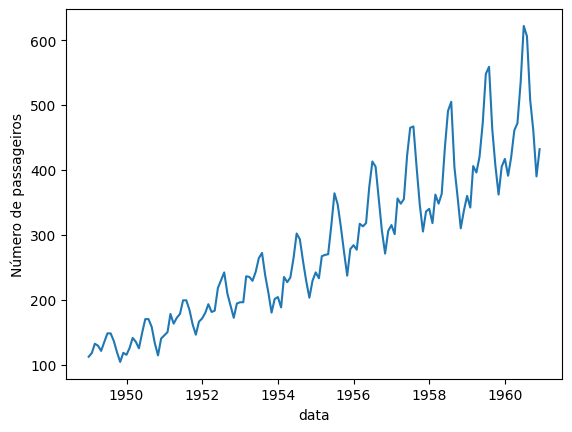

In [91]:
plt.xlabel('data')
plt.ylabel('Número de passageiros')
plt.plot(X, y)

## Como avaliar os dados?

Janelas do mesmo tamanho 

Vamos considerar o Cross-Validation

In [92]:
# vamos visualizar um exemplo 
X_aux = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y_aux = np.array([1, 2, 3, 4, 5, 6])

 #Valores default: n_splits=5, max_train_size=None, test_size=None, gap=0
# Gap - determina o número de amostras a serem excluídas do final de cada conjunto de treinamento antes do conjunto de teste.
tscv = TimeSeriesSplit(n_splits=3) 
print(tscv)

for i, (train_index, test_index) in enumerate(tscv.split(X_aux)):
    print("\nFOLD", i)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_aux[train_index], X_aux[test_index]
    y_train, y_test = y_aux[train_index], y_aux[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

FOLD 0
TRAIN: [0 1 2] TEST: [3]

FOLD 1
TRAIN: [0 1 2 3] TEST: [4]

FOLD 2
TRAIN: [0 1 2 3 4] TEST: [5]


### Treinando o modelo SVR (*Support Vector Regression*) - [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

A regressão de vetor de suporte (SVR) é um tipo de máquina de vetor de suporte (SVM) usada para tarefas de regressão. Ele tenta encontrar uma função que preveja melhor o valor de saída contínua para um determinado valor de entrada.

Métricas de avaliação:

[RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) = $\sqrt{\frac{1}{n}\sum_{t=1}^{n}(y_t-\hat{y_t})^2}$ 

[MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html) = $\frac{1}{n}\sum_{t=1}^{n}|100 \frac{y_t - \hat{y_t}}{y_t}|$


In [117]:
def evaluate_model_with_kfold(kf, model):
    results = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = pd.DataFrame(X.iloc[train]), pd.DataFrame(X.iloc[test])
        y_train, y_test = y.iloc[train], y.iloc[test]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Se for usar rmse
        rmse = mean_squared_error(y_test, y_pred, squared=False) 
        #se for usar MAPE
        # mape = mean_absolute_percentage_error(y_test, y_pred)
        
        print("Fold %d: %.3f" %(fold, rmse))
        
        results.append(rmse)
        fold += 1
    print("\RMSE média (desvio): %.3f +- (%.3f)" %(np.array(results).mean(), np.array(results).std()))

In [118]:
# # n_splits deve ser pelo menos 2
tscv = TimeSeriesSplit(n_splits=5) 
evaluate_model_with_kfold(tscv, SVR())


Fold 0: 56.733
Fold 1: 77.872
Fold 2: 129.673
Fold 3: 171.453
Fold 4: 216.344
\RMSE média (desvio): 130.415 +- (58.751)
